<b>COSMIC RADIATION: Decision tree</b>
    
rodrigoX: Contains 4 parameters
    1. NALLParticlesTotal : Total number of particles generated by the event in the ground level.
    2. MUTotal : Total number of muons.
    3. ELTotal : Total number of electromagnetic particles.
    4. Zenith : Zenith angle of the particle [degrees].
    5. Energy : Particle energy [GeV].

rodrigoY: contains the target
    Labels: photon, proton, helium, nitrogen, iron.
        the smallest number is assigned to photon (A=0) and the highest number to the heaviest particle, this is, iron (B=4).
        
        0==photon     1==proton    2==helium     3==nitrogen   4==iron 
     
     

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

### data

In [2]:
#leave the dataset ready
df_x = pd.read_fwf('XRodrigo.txt')
df_x.columns = ["NALLParticlesTotal", "MUTotal", "ELTotal", "Zenith","Energy"]
df_y=pd.read_fwf('YRodrigo.txt')
df_y.columns = ["Particle"]

transpose=df_x.T
transpose_y=df_y.T #Transpose to put them together
df_tot = transpose.append(transpose_y)
df_tot=df_tot.T.sample(frac=1).reset_index(drop=True)#este el el df completo y barajado

df_y=df_tot[['Particle']]
df_x=df_tot[["NALLParticlesTotal", "MUTotal", "ELTotal", "Zenith","Energy"]]

In [14]:
#train-test split and reescale
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, random_state=0,test_size = 0.25)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_test_np=y_test.to_numpy()
y_train_np=y_train.to_numpy().flatten()


### Grid search

In [28]:
parameters = {'max_depth':range(3,100),'criterion':['entropy']}#mirar como se ve el numero de veces que separo el dataset
                                                                           #y el parametro que me falta añadir
                                                                     #mirar en la pag web los parametros a validar
grid = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=-1,cv=5, verbose=1)
grid_result=grid.fit(X=X, y=y)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.9494653616251102 {'criterion': 'entropy', 'max_depth': 58}


In [ ]:
print(grid_result)
print("The best parameters are %s with a score of %0.5f"
      % (grid_result.best_params_, grid_result.best_score_))
results = pd.DataFrame(grid.cv_results_)
results.to_csv('grid-search-results-01.csv', index=False)

### model


In [17]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy",max_depth=19)  
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

Accuracy: 0.9503714993332063


In [11]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(accuracy_score(y_test, datatest))

[[2111    2    0    1    0]
 [   1 2038   74    9    7]
 [   0   47 1945  113    8]
 [   0    6  139 1932   53]
 [   0    1   14   48 1949]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2114
         1.0       0.97      0.96      0.97      2129
         2.0       0.90      0.92      0.91      2113
         3.0       0.92      0.91      0.91      2130
         4.0       0.97      0.97      0.97      2012

    accuracy                           0.95     10498
   macro avg       0.95      0.95      0.95     10498
weighted avg       0.95      0.95      0.95     10498



### plots

In [36]:
# Get numerical feature importances
importances = list(clf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: MUTotal              Importance: 0.45
Variable: ELTotal              Importance: 0.4
Variable: Energy               Importance: 0.08
Variable: NALLParticlesTotal   Importance: 0.07
Variable: Zenith               Importance: 0.01


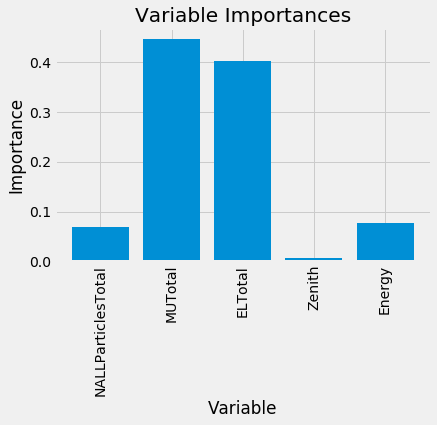

In [37]:
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [23]:
from sklearn.tree import export_graphviz
import pydot
export_graphviz(clf, out_file = 'tree.dot', feature_names = ["NALLParticlesTotal", "MUTotal", "ELTotal", "Zenith","Energy"], rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

In [24]:
feature_list=["NALLParticlesTotal", "MUTotal", "ELTotal", "Zenith","Energy"]
# Limit depth of tree to 3 levels
clf_small =  DecisionTreeClassifier(criterion="entropy",max_depth=3)
clf_small.fit(X_train,y_train)

# Save the tree as a png image
export_graphviz(clf_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');